In [2]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [3]:
from Star import *
from Load import *
from bulk import *

In [4]:
a = 239.55
b = 188.85
c = 144.38
d = 127.47
R1Rvir = 86.45

# Better Gas outflow images

In [5]:
h11 = h1.load_copy(11)
h11.physical_units()
pynbody.analysis.angmom.faceon(h11)

In [42]:
pynbody.analysis.angmom.faceon(h1[11])

In [23]:
plt.figure(figsize=(3,3), dpi=300)
sph.velocity_image(h11, vector_color="cyan", qty="temp",width=30,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, show_cbar = True) #vmin=5e2, vmax=1e6)
plt.savefig('Gas Flow Halo 11', dpi=300)
plt.show()

Exception in thread Thread-108:
Traceback (most recent call last):
  File "/home/engelhar/anaconda3/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/home/engelhar/anaconda3/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/sph/__init__.py", line 440, in bridge
    X = fn(*args[1:], **kwargs)
  File "/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/sph/__init__.py", line 572, in _render_image
    snap_proxy[arname] = snap[arname]
  File "/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/snapshot/__init__.py", line 264, in __getitem__
    return self._get_array_with_lazy_actions(i)
  File "/home/engelhar/anaconda3/lib/python3.7/site-packages/pynbody/snapshot/__init__.py", line 351, in _get_array_with_lazy_actions
    self.__resolve_obscuring_family_array(name)
  File "/home/engelhar/anaconda3/lib/python3.7/site-packages/py

RuntimeError: There was a problem with the multi-threaded image render. Try running again with threaded=False to debug the underlying error.

<Figure size 900x900 with 0 Axes>

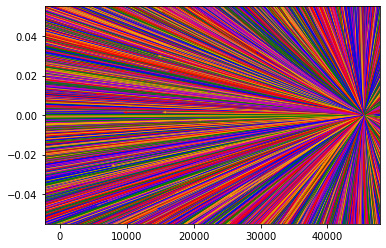

In [26]:
import numpy as np
import matplotlib.pyplot as plt

V = h11.gas['vel']
origin = h11.gas['pos']

plt.quiver(*origin, V[:,0], V[:,1], color=['b', 'm', 'orange', 'r', 'g'], scale=21)
plt.show()

In [35]:
i = 11
sim = s1
h = h1

halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)

pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']

inner_sphere_wind = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
outer_sphere_wind = pynbody.filt.Sphere(str(3*rvir) + ' kpc', [0,0,0])
shell_part_wind = sim[outer_sphere_wind & ~inner_sphere_wind].gas
print(shell_part_wind)

inner_sphere = pynbody.filt.Sphere(str(.9*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(rvir) + ' kpc', [0,0,0])
shell_part = halo[outer_sphere & ~inner_sphere].gas

print(shell_part)

velocity = shell_part['vel'].in_units('kpc yr**-1')
r = shell_part['pos'].in_units('kpc')

vr = np.sum((velocity*r), axis=1)

Vout = []
for x in range(len(vr)):
    if vr[x] > 0:
        vel = list(velocity[x])
        Vout.append(vel)


<SimSnap "/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096:sphere&~sphere::gas" len=12748>
<SimSnap "/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096:sphere&~sphere::gas" len=99>


In [8]:
Wind_mass = np.sum(shell_part_wind['mass'])

avecs = np.array(Vout)
amags = (np.sum((avecs**2), axis=1))**.5
bvec = np.mean(np.array(shell_part_wind['mass'])[np.newaxis].T * shell_part_wind['vel'],axis=0)/Wind_mass
bmag = (np.sum(bvec**2)**.5)

In [ ]:
Theta = []
for avec,amag in zip(avecs,amags):
    adotb = np.sum((avec*bvec))
    ab = amag*bmag
    theta = np.arccos(adotb/ab)
    Theta = np.append(Theta, theta)

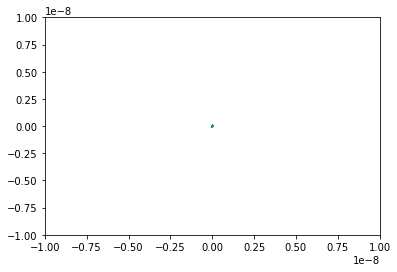

In [40]:
Vel = np.array(shell_part['vel'])
Org = shell_part['pos']
Origin = [0], [0], [0]

plt.quiver(*Origin, velocity[:,0], velocity[:,1], color=['b'], scale=21)
plt.ylim(-1e-8, 1e-8)
plt.xlim(-1e-8, 1e-8)
plt.show()

In [33]:
print(origin)

[[ 13.52816009 -22.00287108 -14.16575238]
 [  2.06378104   3.20972202  -0.38928547]
 [  8.25795936  -3.90396647  -7.59207413]
 ...
 [  7.25894695 -14.05415364  -7.45152142]
 [ -0.34750196  -4.551961     0.48548579]
 [ -4.50138521  -0.92301746   0.51608177]]


In [50]:
i = 11
sim = s1
h = h1

halo_info = sim.halos(dummy=True)
halo = h.load_copy(i)

pynbody.analysis.halo.center(halo)
rvir = halo_info[i].properties['Rvir']

inner_sphere = pynbody.filt.Sphere(str(.2*rvir) + ' kpc', [0,0,0])
outer_sphere = pynbody.filt.Sphere(str(.3*rvir) + ' kpc', [0,0,0])
shell_part = halo[outer_sphere & ~inner_sphere].gas

In [51]:
pynbody.analysis.angmom.faceon(shell_part)